### A python notebook to simulate common risk strategies in a simulated market environment

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [4]:
class Market:
    def __init__(self, steps, up_prob=0.5, point_change=0.1):
        self.up_prob = up_prob
        self.point_change = point_change
        self.current_value = 1.0
        self.steps = steps
        self.history = []

    def simulate_market(self):
        for _ in range(self.steps):
            direction = 1 if np.random.rand() < self.up_prob else -1
            self.current_value += direction * self.point_change
            self.history.append(self.current_value)
        return self.current_value

class Agent:
    def __init__(self, risk_function_type, parameter, belief_threshold):
        self.risk_function_type = risk_function_type
        self.parameter = parameter  # alpha or gamma depending on the type
        self.belief_threshold = belief_threshold
        self.bought_at = None

    def utility_function(self, x):
        if self.risk_function_type == 'log':
            return math.log(x)

        elif self.risk_function_type == 'exponential':
            alpha = self.parameter
            return -math.exp(-alpha * x)
        
        elif self.risk_function_type == 'power':
            gamma = self.parameter
            if gamma != 1:
                return x**(1 - gamma) / (1 - gamma)
            else:
                return math.log(x)
        
        else:
            raise ValueError("Invalid risk function type")

    def risk_aversion_function(self, market_value):
        return self.utility_function(market_value)
        
    def decide_to_buy(self, market_value, step, total_steps):
        probability_of_up = (total_steps - step) / total_steps
        adjusted_belief = probability_of_up / (1 + self.risk_aversion_function(market_value))

        if adjusted_belief > self.belief_threshold and self.bought_at is None:
            self.bought_at = market_value
            print(self.risk_function_type, market_value)

    def calculate_final_value(self, final_market_value):
        if self.bought_at is not None:
            return final_market_value / self.bought_at
        return 1


class LogarithmicAgent(Agent):
    def __init__(self, belief_threshold):
        super().__init__('log', parameter=None, belief_threshold=belief_threshold)


class ExponentialAgent(Agent):
    def __init__(self, alpha, belief_threshold):
        super().__init__('exponential', parameter=alpha, belief_threshold=belief_threshold)


class PowerFunctionAgent(Agent):
    def __init__(self, gamma, belief_threshold):
        super().__init__('power', parameter=gamma, belief_threshold=belief_threshold)






In [5]:
def simulate_agents_in_market(steps=1000, up_prob=0.51, point_change=0.01):
    market = Market(steps, up_prob, point_change)
    agents = [LogarithmicAgent(1.0), ExponentialAgent(3,1.0), PowerFunctionAgent(0.1,0.1)]
    final_market_value = market.simulate_market()
    final_values = {}

    for step, market_value in enumerate(market.history):
        for agent in agents:
            agent.decide_to_buy(market_value, step, steps)

    for agent in agents:
        final_values[agent.__class__.__name__] = agent.calculate_final_value(final_market_value)

    return final_values, market.history


def plot_results(final_values, market_history):
    plt.plot(market_history, label='Market Value')
    for agent_type, value in final_values.items():
        plt.scatter(len(market_history) - 1, value, label=f'{agent_type} Final Value')
    plt.xlabel('Time Steps')
    plt.ylabel('Value')
    plt.title('Market Value and Final Agent Value')
    plt.legend()
    plt.show()


log 0.99
exponential 0.99
power 0.99
{'LogarithmicAgent': 1.2929292929292933, 'ExponentialAgent': 1.2929292929292933, 'PowerFunctionAgent': 1.2929292929292933}


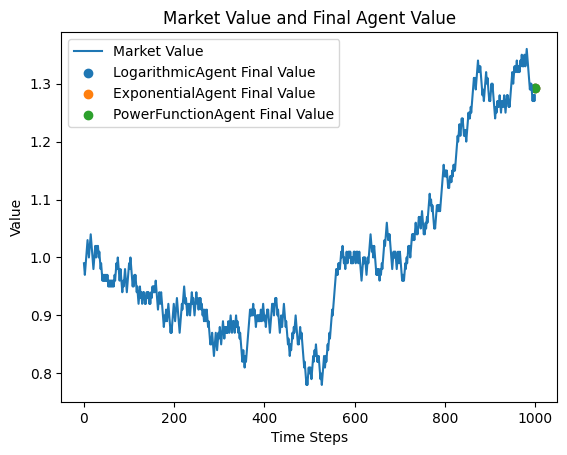

In [6]:
# Run the simulation
final_values, market_history = simulate_agents_in_market()
print(final_values)
plot_results(final_values, market_history)

In [7]:
log_list = []
exp_list = [] 
pow_list = []

for _ in range(100):
    final_values, market_hist = simulate_agents_in_market()
    log_list.append(final_values["LogarithmicAgent"])
    exp_list.append(final_values['ExponentialAgent'])
    pow_list.append(final_values["PowerFunctionAgent"])

print("Log Average:", sum(log_list)/100)
print("Exponential Average:", sum(exp_list)/100)
print("Power Function Average:", sum(pow_list)/100)

exponential 1.01
power 1.01
log 0.97
exponential 1.01
power 1.01
exponential 1.01
power 1.01
log 0.97
log 0.99
exponential 0.99
power 0.99
exponential 1.01
power 1.01
log 0.99
exponential 1.01
power 1.01
exponential 1.01
power 1.01
log 0.99
exponential 1.01
power 1.01
log 0.99
log 0.99
exponential 0.99
power 0.99
log 0.99
exponential 0.99
power 0.99


log 0.99
exponential 0.99
power 0.99
exponential 1.01
power 1.01
log 0.96
log 0.99
exponential 0.99
power 0.99
log 0.99
exponential 0.99
power 0.99
exponential 1.01
power 1.01
log 0.99
exponential 1.01
power 1.01
log 0.99
log 0.99
exponential 0.99
power 0.99
log 0.99
exponential 0.99
power 0.99
log 0.99
exponential 0.99
power 0.99
log 0.99
exponential 0.99
power 0.99
log 0.99
exponential 0.99
power 0.99
log 0.99
exponential 0.99
power 0.99
exponential 1.01
power 1.01
log 0.99
exponential 0.99
power 0.99
exponential 1.01
power 1.01
log 0.99
exponential 0.99
power 0.99
exponential 1.01
power 1.01
log 0.99
log 0.99
exponential 0.99
power 0.99
exponential 1.01
power 1.01
log 0.99
log 0.99
exponential 0.99
power 0.99
exponential 1.01
power 1.01
log 0.99
log 0.99
exponential 0.99
power 0.99
exponential 1.01
power 1.01
log 0.99
exponential 0.99
power 0.99
exponential 1.01
power 1.01
log 0.99
log 0.99
exponential 0.99
power 0.99
log 0.99
exponential 0.99
power 0.99
log 0.99
exponential 0.99
po